# Compare Fitters
Fits binding of calcium onto EDTA. 

In [1]:
%matplotlib inline
import pytc

In [2]:
def fit_with_ml():
    #--------------------------------------------------------------------
    # Create a global fitting instance
    g = pytc.GlobalFit()

    # --------------------------------------------------------------------
    # Load in an experimental data set with a single-site binding model.  Ignore the first two shots
    a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

    # Add the experiment to the fitter
    g.add_experiment(a)

    # --------------------------------------------------------------------
    # Fit the data
    g.fit()
    
    return g

def fit_with_bootstrap(num_bootstrap=1000):
    # --------------------------------------------------------------------
    # Create a global fitting instance
    g = pytc.GlobalFit()

    # --------------------------------------------------------------------
    # Load in an experimental data set with a single-site binding model.  Ignore the first two shots
    a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

    # Add the experiment to the fitter
    g.add_experiment(a)

    # --------------------------------------------------------------------
    # Fit the data

    F = pytc.fitters.BootstrapFitter(num_bootstrap=num_bootstrap)
    g.fit(F)

    return g
    
def fit_with_bayes(num_steps=1000):
    # --------------------------------------------------------------------
    # Create a global fitting instance
    g = pytc.GlobalFit()

    # --------------------------------------------------------------------
    # Load in an experimental data set with a single-site binding model.  Ignore the first two shots
    a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

    # Add the experiment to the fitter
    g.add_experiment(a)

    # --------------------------------------------------------------------
    # Fit the data
    F = pytc.fitters.BayesianFitter(num_steps=num_steps)
    g.fit(F)
    
    return g

### Do fits

In [3]:
print("*** ML fit ***")
ml = fit_with_ml()

print("*** Bootstrap fit ***")
bootstrap = fit_with_bootstrap(num_bootstrap=1000)

print("*** Bayesian fit ***")
bayes = fit_with_bayes(num_steps=1000)


*** ML fit ***
*** Bootstrap fit ***
*** Bayesian fit ***


### Show fits

# Fit successful? False
# Fit type: maximum likelihood
# AIC: -96.23759423779696
# AICc: -93.8028116291013
# BIC: -84.30368995841131
# F: 292708.2585218862
# Rsq: 0.9999672039142115
# Rsq_adjusted: 0.9999637876552752
# ln(L): 54.11879711889848
# num_obs: 54
# num_param: 5
# p: 1.1102230246251565e-16
type,name,dh_file,value,stdev,fixed,guess,lower_bound,upper_bound
local,dH,ca-edta/tris-01.DH,-1.15669e+04,1.00638e+01,float,-4.00000e+03,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,-6.12671e-01,6.71064e-02,float,0.00000e+00,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.73948e-01,8.86443e-05,float,1.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,4.05476e+07,4.31258e+05,float,1.00000e+06,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.15715e+03,4.65377e+02,float,0.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


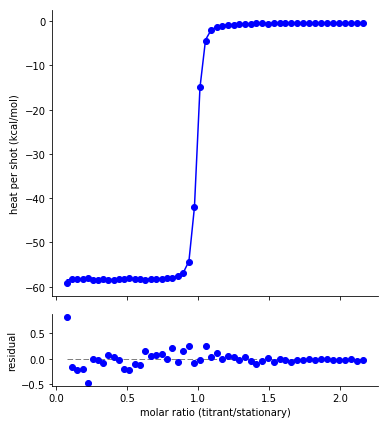

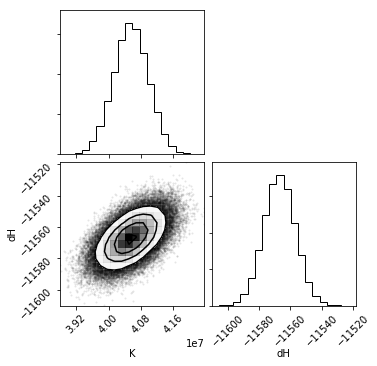

In [4]:
print(ml.fit_as_csv)
fig, ax = ml.plot()
ml.corner_plot()

# Fit successful? True
# Fit type: bootstrap
#   bootstrap: Num bootstrap: 1000
#   bootstrap: Perturb size: 1.0
#   bootstrap: Use experimental error: False
# AIC: 13.404504563678433
# AICc: 15.839287172374085
# BIC: 25.33840884306408
# F: 292708.37768860895
# Rsq: 0.9999672018450826
# Rsq_adjusted: 0.999963785370612
# ln(L): -0.7022522818392168
# num_obs: 54
# num_param: 5
# p: 1.1102230246251565e-16
type,name,dh_file,value,stdev,fixed,guess,lower_bound,upper_bound
local,dH,ca-edta/tris-01.DH,-1.15671e+04,1.41705e+01,float,-4.00000e+03,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,-6.12240e-01,9.47647e-02,float,0.00000e+00,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.73952e-01,1.23300e-04,float,1.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,4.05788e+07,6.05720e+05,float,1.00000e+06,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.16124e+03,6.55953e+02,float,0.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


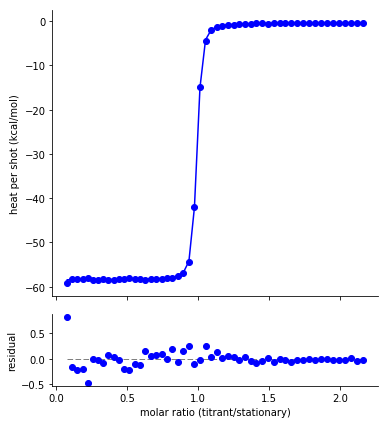

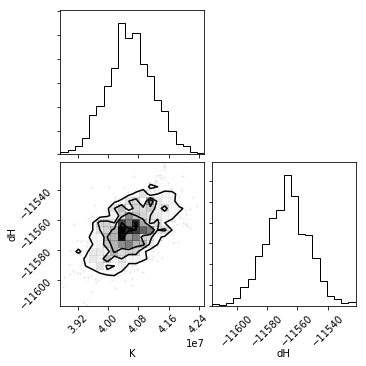

In [5]:
print(bootstrap.fit_as_csv)
fig, ax = bootstrap.plot()
bootstrap.corner_plot()

# Fit successful? True
# Fit type: bayesian
#   bayesian: Burn in: 0.1
#   bayesian: Final sample number: 90000
#   bayesian: Initial walker spread: 0.0001
#   bayesian: Num steps: 1000
#   bayesian: Num threads: 1
#   bayesian: Num walkers: 100
#   bayesian: Use ML guess: True
# AIC: -96.2346799397904
# AICc: -93.79989733109474
# BIC: -84.30077566040475
# F: 292693.333824799
# Rsq: 0.9999672032336612
# Rsq_adjusted: 0.9999637869038343
# ln(L): 54.1173399698952
# num_obs: 54
# num_param: 5
# p: 1.1102230246251565e-16
type,name,dh_file,value,stdev,fixed,guess,lower_bound,upper_bound
local,dH,ca-edta/tris-01.DH,-1.15663e+04,1.41242e+01,float,-4.00000e+03,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,-6.16562e-01,9.35008e-02,float,0.00000e+00,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.73949e-01,1.25297e-04,float,1.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,4.05583e+07,6.24432e+05,float,1.00000e+06,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.17926e+03,6.48535e+02,floa

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


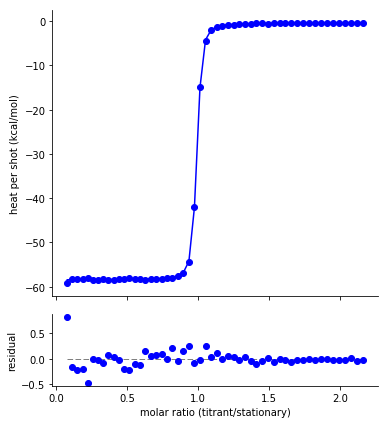

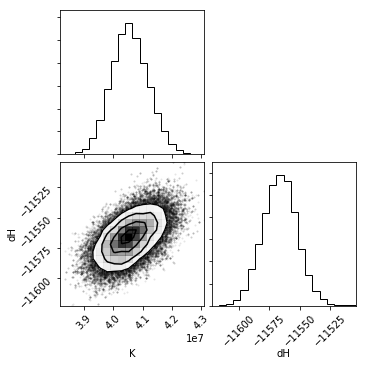

In [6]:
print(bayes.fit_as_csv)
fig, ax = bayes.plot()
bayes.corner_plot()

###  Show timing

In [7]:
print("*** ML fit ***")
%timeit fit_with_ml()
print("")

print("*** Bootstrap fit ***")
%timeit fit_with_bootstrap(1000)
print("")

print("*** Bayesian fit ***")
%timeit fit_with_bayes(1000)
print("")

*** ML fit ***
100 loops, best of 3: 15.5 ms per loop

*** Bootstrap fit ***
1 loop, best of 3: 11.1 s per loop

*** Bayesian fit ***
1 loop, best of 3: 11.7 s per loop

